# Regularization
Regularization is a widespread technique in machine learning, which is used to control the complexity of the machine learning model and thereby improve its generalization ability.

## What is Regularization?
Regularization is a technique to prevent overfitting by penalizing complex models. The idea is to add a penalty term to the cost function of the model, such that it becomes dependent on two factors:

$$\text{Cost}(h) = \text{Training Error}(h) + \lambda \ \text{Complexity}(h)$$

$\lambda$ is a hyperparameter (called the regularization coefficient) that controls the tradeoff between the bias and the variance. Higher $\lambda$ will induce a larger penalty on the complexity of the model, and thus will lead to simpler models with higher error on the training set but with smaller variance.

The complexity of the model can be measured in a variety of ways. For example, in models that consist of a vector of parameters (weights) $w$, such as linear regression or neural networks, we use the size of the parameters (the norm of the vector $w$) as a measure for the model’s complexity. In such models, there are two common types of regularization, depending on the norm of the vector $w$ that we are using:

1. **L1 regularization.** In this case, we use the $L1$ norm of the vector $w$, i.e., the sum of the absolute values of the weights. For example, in linear regression, if we have $m$ features in our data set, then the model will have $m$ parameters (weights) plus a bias term, thus we can write the $L1$ norm of $w$ as:

$$||W||_1 = |w_0| + |w_1| + \cdots + |w_m|$$

2. **L2 regularization.** In this case, we use the $L2$ norm of the vector $w$ (squared), i.e., the sum of the squares of the weights:

$$||w||_2 ^2 = w_0 ^2 + w_1 ^2 + \cdots + w_m ^2 $$

In general, $L1$ regularization is a stronger form of regularization than $L2.$ In $L1$ regularization, the rate at which the weights drop to 0 is constant (since the gradient of $|w_j|$ is 1), while in $L2$ regularization, the rate becomes slower as the weights approach 0 (since the gradient of $w_j^2$ is $2w_j$). Hence, $L1$ is more likely to zero out some of the weights, effectively removing their associated features from the model.

Normally, the bias (intercept) $w_0$ is not regularized, since penalizing the model based on the intercept value can have a dramatic effect on the resulting model. For example, in linear regression, changing $w_0$ shifts the regression hyperplane closer or farther from the origin along the dimension of the target variable $y$, while setting $w_0$ to exactly 0 forces the hyperplane to go through the origin.

## Regularization in Linear Regression
Recall that in linear regression problems, we are trying to find a linear relationship between a set of input variables $x$ and a target variable $y$. 

In order to learn the mapping between $x$ and $y$, we are given a set of $n$ labeled examples: $D = \{(x_1, y_1), (x_2, y_2), \cdots , (x_n, y_n)\}$, where $x_i$ represents the features of example $i$ and $y_i$ represents the label of that example. $x_i$ is a vector that consists of $m$ features, i.e., $x_i = (x_{i1}, x_{i2}, \cdots, x_{im})$.

Our goal is to find a line (or a hyperplane) that goes as close as possible through all the data points. To that end, our model tries to learn a linear function of the features (called the model's hypothesis):

$$h(x) = w_0 + w_1 x_1 + \cdots + w_m x_m$$

Using our data set we need to find the parameters $w$ of this function that will make the model's predictions as close as possible to the true labels of the points. To that end, we define the least squares cost function that measures the sum of squared differences between the model's predictions and the true labels:

$$J(w) = \sum_{i=1}^n (h(x_i) - y_i)^2$$

Our goal is to find the parameters $w$ that will minimize $J(w)$. There are two main methods to do so: using a closed-form solution (also known as the normal equations) or by using gradient descent.

## Ridge Regression
<hr>
When $L2$ regularization is applied to linear regression, we call this model **ridge regression.** In ridge regression, we add to the cost function a penalty term that depends on the $L2$ norm of the weight vector:

$$J(w) = \sum_{i=1}^n \left(h(x_i) - y_i\right)^2 + \lambda \ \sum_{j=1}^m w_j^2$$

In Scikit-Learn, we can use the `Ridge` class to perform ridge regression, i.e., to find the weights that minimize the above cost function. By default, $\lambda$ (which is called `alpha` in Scikit-Learn) is set to `1.0`.

For example, let's examine what happens when we try to fit a polynomial to a given set of points using ridge regression. Assume that our training set consists of 50 data points that were sampled from the function $f(x) = sin(x)$ in the interval $[0, 10]$ with some random noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

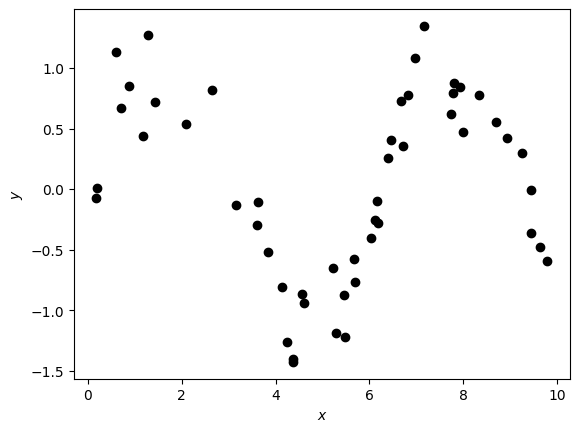

In [2]:
def make_data(n=50):
    rng = np.random.RandomState(0)
    X = rng.rand(n, 1) * 10
    err = rng.normal(size=n) * 0.3
    y = np.sin(X).ravel() + err
    return X, y

def plot_data(X, y):
    plt.scatter(X, y, color='k')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

X, y = make_data()
plot_data(X, y)

Let's use ridge regression to fit a polynomial of degree 10 to the given data points and examine the effect of changing the regularization coefficient.

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

def RidgePolynomialRegression(degree=10, alpha=1):
    return Pipeline([('scaler', StandardScaler()),
                     ('polyfeatures', PolynomialFeatures(degree)),
                     ('ridge', Ridge(alpha))])

We now train this model on the given training set using 10 different values of $\lambda$ ranging from `0.00001` to `10,000`.

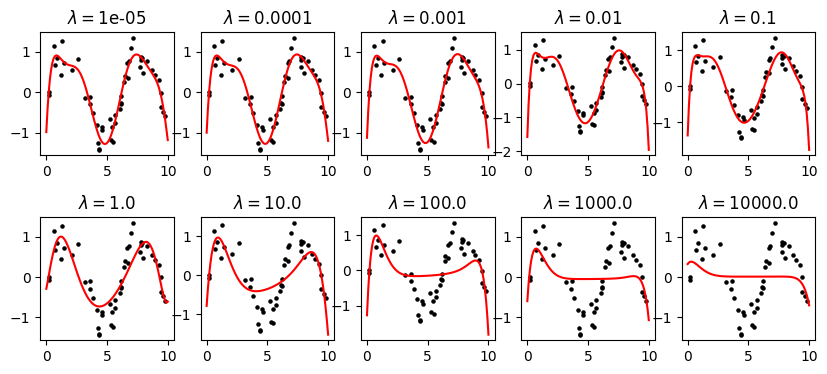

In [4]:
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
plt.subplots_adjust(hspace=0.5)
alpha = 0.00001

for ax in axes.flat:
    reg = RidgePolynomialRegression(alpha=alpha)
    reg.fit(X, y)
    y_test = reg.predict(X_test)
    ax.plot(X_test, y_test, color='r')
    ax.set_title(f'$\lambda = ${alpha}')
    ax.scatter(X, y, color='k', s=5)
    alpha *= 10

We can see that for small values of $\lambda$ the model **overfits** the data, i.e., it tries to fit itself to the noise in the data and deviates from the general shape of the sine function. On the other hand, for large values of $\lambda$ the model **underfits** the data, until at some point it almost becomes a straight line. The best model lies somewhere in the middle (e.g., when $\lambda = 1$), where we obtain a good representation of the function $sin(x)$.

Let's examine what happens to the coefficients of the polynomial (including the intercept) as we increase $\lambda$:

In [5]:
alpha = 0.00001
for i in range(10):
    reg = RidgePolynomialRegression(degree=10, alpha=alpha)
    reg.fit(X, y)
    intercept = reg.named_steps['ridge'].intercept_
    coef = reg.named_steps['ridge'].coef_[1:]
    coef = np.hstack((intercept, coef))
    print(np.round(coef, 5))
    alpha *= 10

[-1.02497  2.45811  5.07749 -5.06399 -5.79087  3.87586  3.10964 -1.32464
 -0.8072   0.15995  0.07846]
[-1.02282  2.45003  5.04888 -5.01975 -5.71853  3.81284  3.04189 -1.29247
 -0.78026  0.15457  0.0746 ]
[-1.00411  2.37966  4.80024 -4.63604 -5.09208  3.26768  2.45643 -1.01466
 -0.54783  0.10809  0.04136]
[-0.92307  2.08199  3.77382 -3.08374 -2.60116  1.12473  0.18157  0.05777
  0.34173 -0.06909 -0.08452]
[-0.78381  1.64614  2.54408 -1.57621 -0.65753 -0.26159 -0.99333  0.52897
  0.64462 -0.12137 -0.11185]
[-0.53873  0.96702  1.07458 -0.31639  0.148   -0.23868 -0.25638 -0.00456
 -0.00478  0.02347  0.01398]
[-0.30682  0.38812  0.32323  0.04662  0.18998 -0.06104  0.04842 -0.08149
 -0.08425  0.01753  0.01081]
[-0.14427  0.07303  0.06003  0.02638  0.05438  0.00729  0.04498 -0.00547
  0.02389 -0.01319 -0.01825]
[-0.0479   0.00768  0.00982  0.00154  0.01325 -0.00323  0.01852 -0.00848
  0.02091 -0.00444 -0.01086]
[ 0.01092  0.00051  0.00131 -0.00042  0.00208 -0.00155  0.00329 -0.00313
  0.00398

We can see that the coefficients become gradually smaller, but they do not reach exactly zero.

Typically, we find the best regularization coefficient using `grid search` and `cross-validation.` For example, we can run grid search on both the polynomial degree and the regularization coefficient to find the model that provides the highest validation score:

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polyfeatures__degree': np.arange(1, 11),
    'ridge__alpha': np.logspace(-5, 4, num=10)
}

grid = GridSearchCV(RidgePolynomialRegression(), param_grid, n_jobs=-1)
grid.fit(X, y)

print(grid.best_params_)

{'polyfeatures__degree': 8, 'ridge__alpha': 0.01}


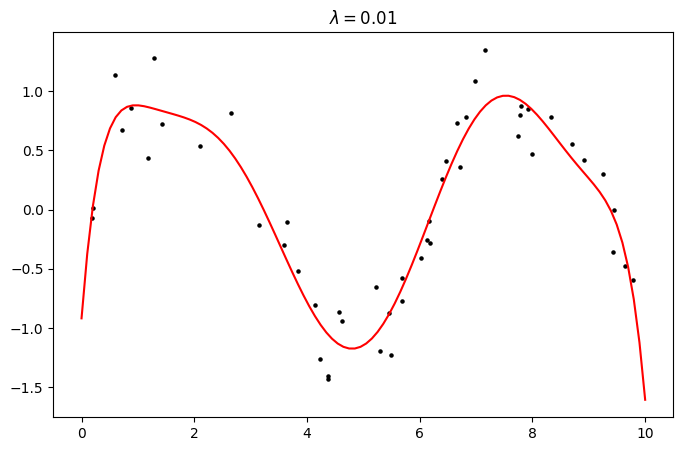

In [8]:
alpha=0.01
degree = 8

fig, ax = plt.subplots(1, figsize=(8, 5))
reg = RidgePolynomialRegression(degree=degree, alpha=alpha)
reg.fit(X, y)
y_test = reg.predict(X_test)
ax.plot(X_test, y_test, color='r')
ax.set_title(f'$\lambda = ${alpha}')
ax.scatter(X, y, color='k', s=5)

## Lasso Regression
<hr>
Lasso regression is very similar to ridge regression, except that we use L1 regularization instead of L2 regularization. Its cost function has the following form:

$$J(w) = \sum_{i=1}^n \left(h(x_i) - y_i\right)^2 + \lambda \ \sum_{j=1}^m |w_j|$$

In [9]:
from sklearn.linear_model import Lasso

def LassoPolynomialRegression(degree=10, alpha=1):
    return Pipeline([('scaler', StandardScaler()),
                     ('polyfeatures', PolynomialFeatures(degree)),
                     ('lasso', Lasso(alpha))])

In [13]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

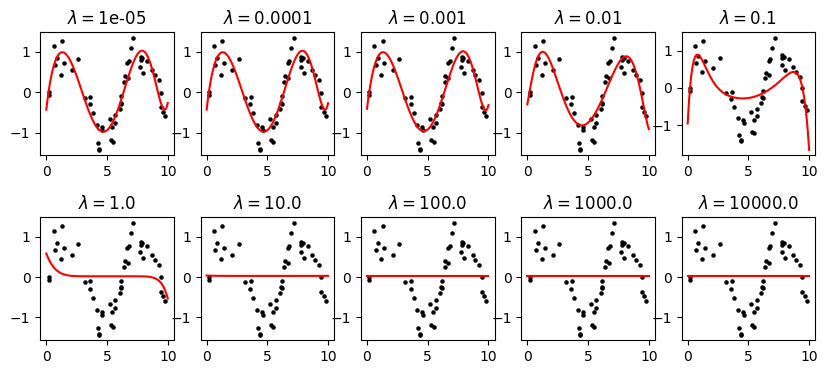

In [14]:
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
plt.subplots_adjust(hspace=0.5)
alpha = 0.00001

for ax in axes.flat:
    reg = LassoPolynomialRegression(alpha=alpha)
    reg.fit(X, y)
    y_test = reg.predict(X_test)
    ax.plot(X_test, y_test, color='r')
    ax.set_title(f'$\lambda = ${alpha}')
    ax.scatter(X, y, color='k', s=5)
    alpha *= 10

We can clearly see that the regularization had a much stronger effect on the model than in ridge regression. Let's examine what happens to the coefficients of the polynomial as we increase $\lambda$:

In [15]:
alpha = 0.00001
for i in range(10):
    reg = LassoPolynomialRegression(degree=10, alpha=alpha)
    reg.fit(X, y)
    intercept = reg.named_steps['lasso'].intercept_
    coef = reg.named_steps['lasso'].coef_[1:]
    coef = np.hstack((intercept, coef))
    print(np.round(coef, 5))
    alpha *= 10

[-7.90490e-01  1.46824e+00  2.64000e+00 -1.16847e+00 -1.37768e+00
  1.91600e-02  1.35140e-01  4.17100e-02  2.78000e-02  6.26000e-03
 -1.33000e-03]
[-7.88960e-01  1.46588e+00  2.62935e+00 -1.16567e+00 -1.36644e+00
  1.95900e-02  1.32100e-01  4.09400e-02  2.76100e-02  6.37000e-03
 -1.24000e-03]
[-7.73490e-01  1.44081e+00  2.52203e+00 -1.13307e+00 -1.25259e+00
  2.06400e-02  1.00690e-01  3.37900e-02  2.59300e-02  7.53000e-03
 -2.70000e-04]
[-6.19550e-01  1.19047e+00  1.52316e+00 -8.09130e-01 -2.99710e-01
 -0.00000e+00 -1.09740e-01 -0.00000e+00  2.30000e-04  9.27000e-03
  6.38000e-03]
[-2.4686e-01  2.3333e-01  3.6842e-01  0.0000e+00  0.0000e+00 -0.0000e+00
  2.2020e-02 -4.0390e-02  0.0000e+00 -3.6000e-04 -8.7300e-03]
[ 0.01985  0.       0.      -0.       0.      -0.       0.      -0.
  0.      -0.00311 -0.00095]
[ 2.886e-02 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00
  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00  1.000e-05]
[ 0.02946 -0.       0.      -0.       0.      -0.       

The coefficients decrease much more rapidly than in ridge regression, until they become exactly zero (except for the intercept which is not regularized). **This is why Lasso regression is sometimes used as a method for feature selection.**

## Elastic-Net Regression
<hr>

**Elastic net is a middle ground between ridge and lasso regressions.**

It combines both the $L1$ and $L2$ penalties using a mixing parameter denoted by $r \ (0 \leq r \leq 1)$, i.e., its loss function is:

$$J(w) = \sum_{i=1}^n \left(h(x_i) - y_i\right)^2 + r\lambda \ \sum_{j=1}^m |w_j| + \frac{1-r}{2} \lambda \ \sum_{j=1}^m w_j^2$$

For $r = 0$, elastic net is the same as ridge regression, and for $r = 1$, it is the same as lasso regression.

In [16]:
from sklearn.linear_model import ElasticNet

def ElasticPolynomialRegression(degree=10, alpha=1, l1_ratio=0.5):
    return Pipeline([('scaler', StandardScaler()),
                     ('polyfeatures', PolynomialFeatures(degree)),
                     ('ElasticNet', ElasticNet(alpha=alpha, l1_ratio=l1_ratio))])

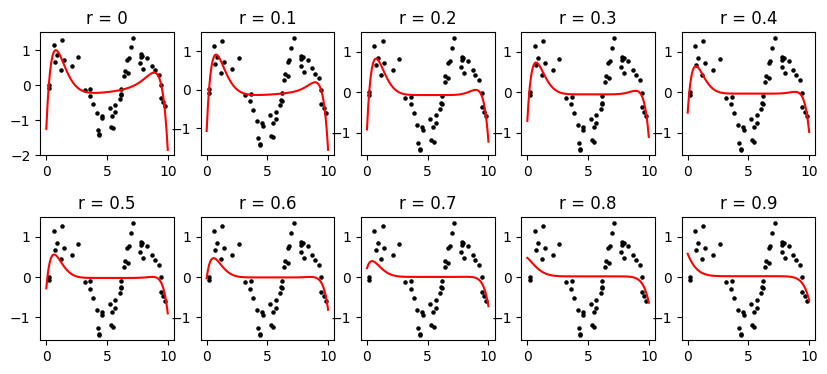

In [23]:
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
plt.subplots_adjust(hspace=0.5)
l1_ratio = 0

for ax in axes.flat:
    reg = ElasticPolynomialRegression(l1_ratio=l1_ratio)
    reg.fit(X, y)
    y_test = reg.predict(X_test)
    ax.plot(X_test, y_test, color='r')
    ax.set_title(f'r = {round(l1_ratio,1 )}')
    ax.scatter(X, y, color='k', s=5)
    l1_ratio += 0.1

As can be seen, increasing $r$ induces a stronger regularization on the model, until it becomes almost flat.